# American Expresss Credit Card Customers Churn Prediction

## Introduction 
This project is about classifying and predicting whether a customer would churn or not using Machine Learning Classification Techniques. The Project includes Data cleaning, EDA, Development of various predictive models and assessment of all of them and  to come up with the model which gives the best output. Various feature engineering techniques also come into play to optimize the model.

In [1]:
# necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('white')

##  Data

In [2]:
df= pd.read_csv('credit_card_churn.csv')
print('Shape- ',df.shape)
print('\n')
print('Dtpyes- ','\n',df.dtypes.value_counts())

Shape-  (10127, 23)


Dtpyes-  
 int64      10
float64     7
object      6
dtype: int64


In [3]:
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1650,716882658,Existing Customer,62,F,2,Graduate,Married,Less than $40K,Blue,51,...,2986.0,1632,1354.0,0.883,2141,55,0.667,0.547,0.000327,0.999670
6170,789692283,Existing Customer,47,F,5,College,Single,Less than $40K,Blue,34,...,5950.0,0,5950.0,0.440,4655,66,0.784,0.000,0.000181,0.999820
9415,717439983,Attrited Customer,48,M,2,Graduate,Married,$80K - $120K,Blue,28,...,14774.0,2517,12257.0,0.979,8293,63,0.703,0.170,0.996710,0.003294
7762,716481408,Existing Customer,38,F,2,Graduate,Single,Less than $40K,Blue,36,...,1461.0,0,1461.0,0.681,4769,76,0.949,0.000,0.000033,0.999970
9055,719296383,Existing Customer,38,M,2,High School,Single,$60K - $80K,Gold,18,...,34516.0,1494,33022.0,0.588,7885,85,0.635,0.043,0.000214,0.999790


## Data Pre-processing

In [4]:
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

df.shape

(10127, 20)

In [5]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.duplicated().sum()

0

## EDA 
We will do analysis in order to find the elements which are resulting into customer churning. In order to avoid the repetition of a code it is better to define a function to give us a visualization of factors we are looking for with respect to Attrition flag. It will save time and will not lead to repetition of same code.

In [7]:
def get_eda(column):
    frame= df[['Attrition_Flag', column]].groupby(column).value_counts(normalize=True).to_frame(name='Pct').reset_index()
    plt.figure(figsize=(12,6))
    plt.bar(frame[column],frame['Pct'])
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.ylim(0,1)
    plt.xticks(rotation=45);
    return frame
    return 

### Age of customers with respect to Existing and churned customers 

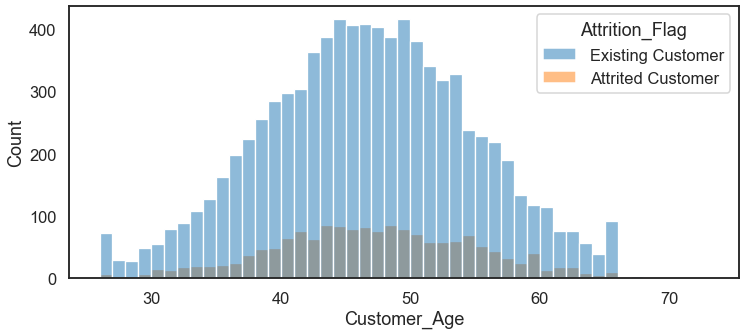

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(x= 'Customer_Age', data= df, hue= 'Attrition_Flag');

### Which Card Category's Customers are Churning more?

,Card_Category,Attrition_Flag,Pct
0,Blue,Existing Customer,0.839021
1,Blue,Attrited Customer,0.160979
2,Gold,Existing Customer,0.818966
3,Gold,Attrited Customer,0.181034
4,Platinum,Existing Customer,0.750000
5,Platinum,Attrited Customer,0.250000
6,Silver,Existing Customer,0.852252
7,Silver,Attrited Customer,0.147748


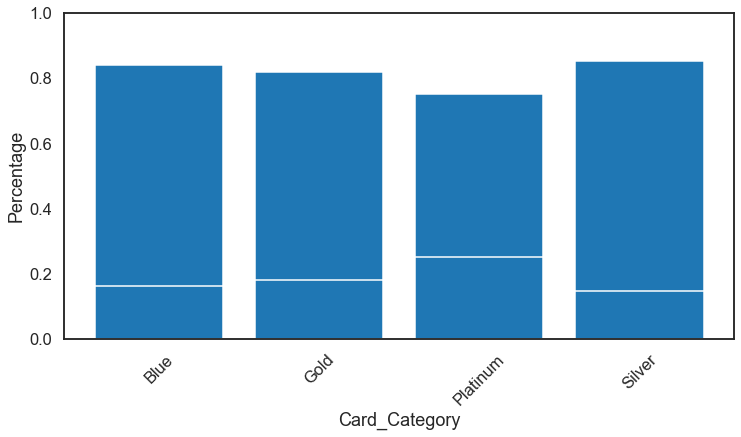

In [9]:
get_eda('Card_Category')

It is noteable that Platinum Category's customers churning rate is 25% and it is higher than the rest of categories. Other Categories Churning rate is more or less same, in fact Silver Category is performing better among all, it has Churning rate of 14.78% which is less than the rest. 

### Which gender has a higher churning rate?

,Gender,Attrition_Flag,Pct
0,F,Existing Customer,0.826428
1,F,Attrited Customer,0.173572
2,M,Existing Customer,0.853848
3,M,Attrited Customer,0.146152


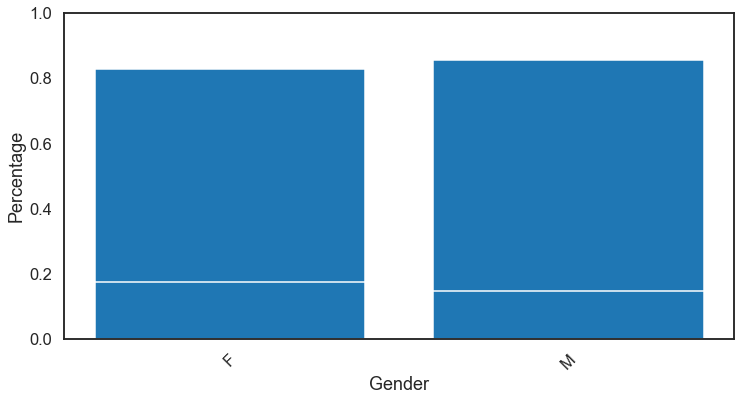

In [10]:
get_eda('Gender')

### Does education level of customers indicating any pattern of churning ?

,Education_Level,Attrition_Flag,Pct
0,College,Existing Customer,0.847976
1,College,Attrited Customer,0.152024
2,Doctorate,Existing Customer,0.789357
3,Doctorate,Attrited Customer,0.210643
4,Graduate,Existing Customer,0.844309
5,Graduate,Attrited Customer,0.155691
6,High School,Existing Customer,0.847988
7,High School,Attrited Customer,0.152012
8,Post-Graduate,Existing Customer,0.821705
9,Post-Graduate,Attrited Customer,0.178295


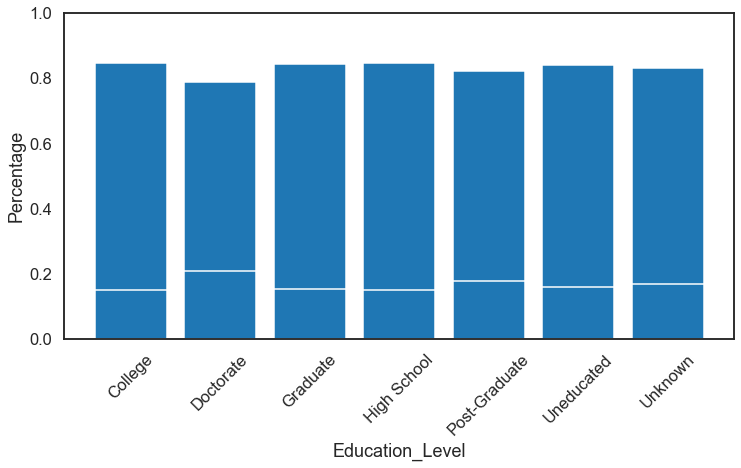

In [11]:
get_eda('Education_Level')

Doctorate degree holder customers have a high churning rate compared to others. Rest of customers numbers are quite near to each other.

### Customers' Marital Status and their Churning rate 

,Marital_Status,Attrition_Flag,Pct
0,Divorced,Existing Customer,0.838235
1,Divorced,Attrited Customer,0.161765
2,Married,Existing Customer,0.848731
3,Married,Attrited Customer,0.151269
4,Single,Existing Customer,0.830586
5,Single,Attrited Customer,0.169414
6,Unknown,Existing Customer,0.827770
7,Unknown,Attrited Customer,0.172230


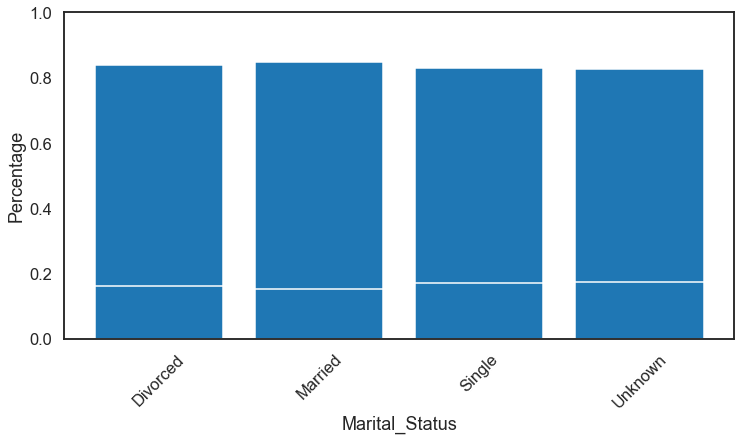

In [12]:
get_eda('Marital_Status')

,Income_Category,Attrition_Flag,Pct
0,$120K +,Existing Customer,0.826685
1,$120K +,Attrited Customer,0.173315
2,$40K - $60K,Existing Customer,0.848603
3,$40K - $60K,Attrited Customer,0.151397
4,$60K - $80K,Existing Customer,0.865193
5,$60K - $80K,Attrited Customer,0.134807
6,$80K - $120K,Existing Customer,0.842345
7,$80K - $120K,Attrited Customer,0.157655
8,Less than $40K,Existing Customer,0.828138
9,Less than $40K,Attrited Customer,0.171862


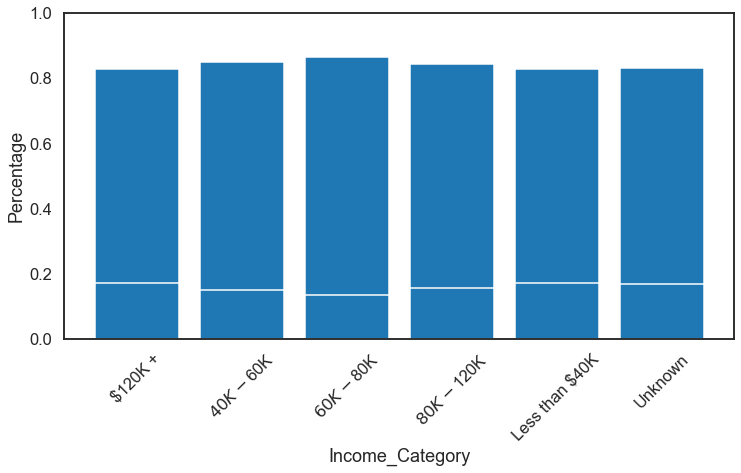

In [13]:
get_eda('Income_Category')

### Utilization Ratio 

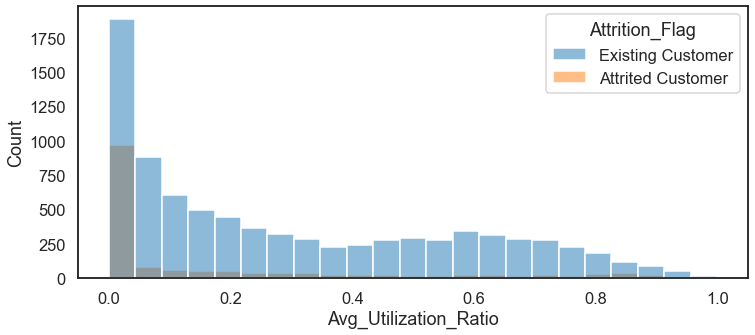

In [14]:
plt.figure(figsize=(12,5))
sns.histplot(x='Avg_Utilization_Ratio',data=df, hue= 'Attrition_Flag');

### Credit Limit 

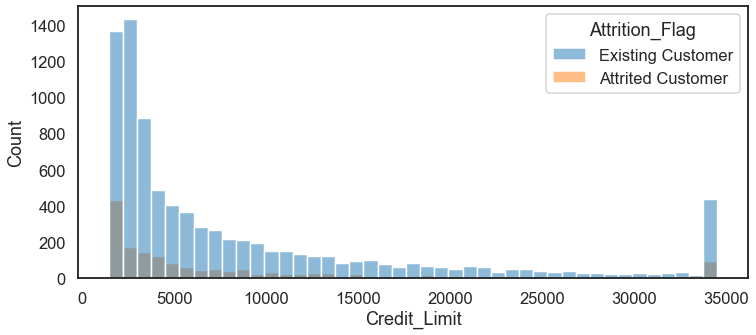

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['Credit_Limit'],data=df, hue= 'Attrition_Flag');

### Revolving Balance 

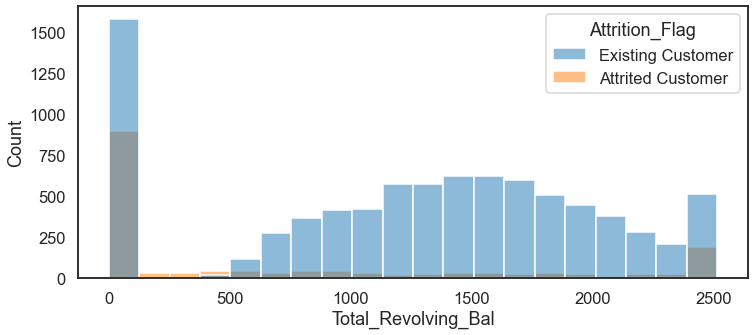

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['Total_Revolving_Bal'],data=df, hue= 'Attrition_Flag');

## Feature Engineering

In [17]:
num_col= df.select_dtypes(include=[int, float]).columns
num_col

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()

In [19]:
df['Attrition_Flag']= lb.fit_transform(df['Attrition_Flag'])
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [20]:
print(df.dtypes.value_counts())
df.head()

int64      9
object     5
float64    5
int32      1
dtype: int64


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
uniq_vals= df.nunique().sort_values(ascending=False)
uniq_vals

Avg_Open_To_Buy             6813
Credit_Limit                6205
Total_Trans_Amt             5033
Total_Revolving_Bal         1974
Total_Amt_Chng_Q4_Q1        1158
Avg_Utilization_Ratio        964
Total_Ct_Chng_Q4_Q1          830
Total_Trans_Ct               126
Customer_Age                  45
Months_on_book                44
Contacts_Count_12_mon          7
Months_Inactive_12_mon         7
Education_Level                7
Total_Relationship_Count       6
Income_Category                6
Dependent_count                6
Card_Category                  4
Marital_Status                 4
Gender                         2
Attrition_Flag                 2
dtype: int64

In [22]:
cat_df= df.select_dtypes(include=object).head()
cat_df

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [23]:
cat_col= [x for x in cat_df.columns if x not in 'Income_Category']
cat_col

['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']

In [24]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [25]:
df['Income_Category']= (df['Income_Category'].str.replace('Unknown','0').replace('Less than $40K','1').replace('$40K - $60K','2').
 replace('$80K - $120K','4').replace('$60K - $80K','3').replace('$120K +','5')).astype(int)
df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

In [26]:
ordinal_col= ['Income_Category']

In [27]:
df_pro= pd.get_dummies(df,columns=cat_col, drop_first=True)
df_pro.shape

(10127, 29)

In [28]:
df_pro.head()

,Attrition_Flag,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,3,39,5,1,3,12691.0,777,...,1,0,0,0,1,0,0,0,0,0
1,1,49,5,1,44,6,1,2,8256.0,864,...,0,0,0,0,0,1,0,0,0,0
2,1,51,3,4,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,40,4,1,34,3,4,1,3313.0,2517,...,1,0,0,0,0,0,1,0,0,0
4,1,40,3,3,21,5,1,0,4716.0,0,...,0,0,1,0,1,0,0,0,0,0


In [29]:
df_pro.dtypes.value_counts()

uint8      13
int64       9
float64     5
int32       2
dtype: int64

## Correlation 

In [30]:
feat_cols= [x for x in df_pro.columns if x not in 'Attrition_Flag']
tar_col= 'Attrition_Flag'

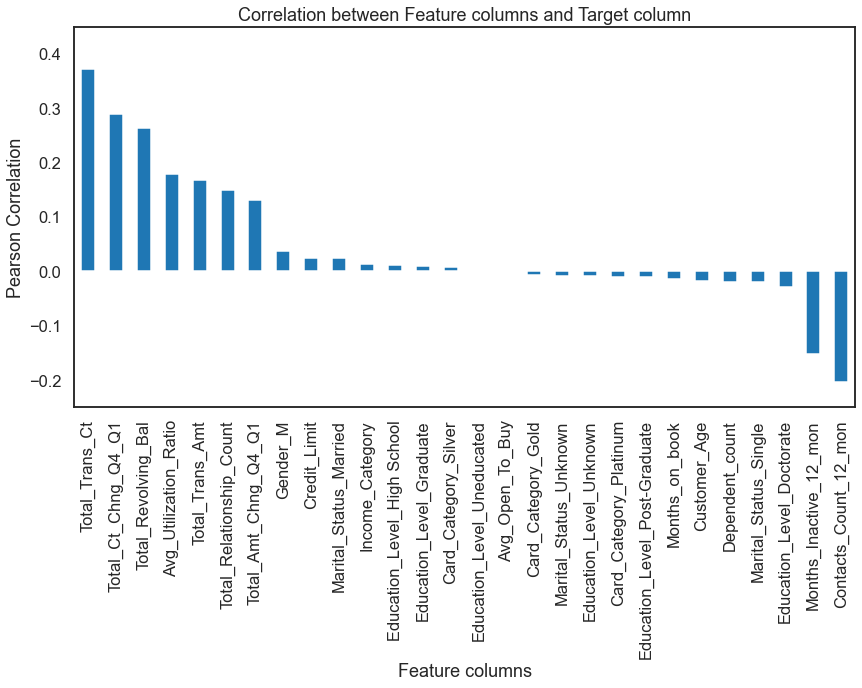

In [31]:
corr_df= df_pro[feat_cols].corrwith(df_pro[tar_col]).sort_values(ascending=False)
ax= corr_df.plot(kind='bar',figsize=(14,7))
ax.set(xlabel='Feature columns',
       ylabel='Pearson Correlation', 
       title= 'Correlation between Feature columns and Target column',
       ylim=[-0.25,0.45]);

## Scaling of features

In [32]:
num_col= list(num_col)
num_col

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [33]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [34]:
for col in [num_col+ordinal_col]:
    df_pro[col]= ss.fit_transform(df_pro[col])

In [35]:
df_pro.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,8.393404e-01,0.367235,0.000000,1.000000,1.000000,1.000000,1.000000
Customer_Age,10127.0,3.127744e-17,1.000049,-2.535541,-0.664382,-0.040662,0.707802,3.327426
Dependent_count,10127.0,5.680062e-15,1.000049,-1.806378,-1.036462,-0.266547,0.503368,2.043199
Income_Category,10127.0,1.771029e-15,1.000049,-1.414457,-0.736292,-0.058127,0.620039,1.976370
Months_on_book,10127.0,-5.687166e-16,1.000049,-2.871068,-0.617129,0.008965,0.509840,2.513340
Total_Relationship_Count,10127.0,8.453372e-15,1.000049,-1.809512,-0.522785,0.120579,0.763943,1.407306
Months_Inactive_12_mon,10127.0,-2.129892e-15,1.000049,-2.316674,-0.337598,-0.337598,0.651940,3.620555
Contacts_Count_12_mon,10127.0,1.588144e-15,1.000049,-2.219655,-0.411616,-0.411616,0.492404,3.204463
Credit_Limit,10127.0,9.430893e-16,1.000049,-0.791527,-0.668655,-0.449252,0.267986,2.848054
Total_Revolving_Bal,10127.0,-1.830898e-15,1.000049,-1.426858,-0.986339,0.138887,0.762241,1.661686


## Data split into Training and Testing set 

In [36]:
from sklearn.model_selection import train_test_split

x= df_pro[feat_cols]
y= df_pro[tar_col]

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state= 42)

In [38]:
print('Original Set- ','\n',y.value_counts(normalize=True))
print('\n')
print('Training Set- ','\n',y_train.value_counts(normalize=True))
print('\n')
print('Testing Set- ','\n', y_test.value_counts(normalize=True))

Original Set-  
 1    0.83934
0    0.16066
Name: Attrition_Flag, dtype: float64


Training Set-  
 1    0.840435
0    0.159565
Name: Attrition_Flag, dtype: float64


Testing Set-  
 1    0.836788
0    0.163212
Name: Attrition_Flag, dtype: float64


## Model Development 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC

In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report,accuracy_score

In [41]:
lr= LogisticRegression()
knn= KNeighborsClassifier()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
gb= GradientBoostingClassifier()
l_svm= LinearSVC()
k_svm= SVC()

In [42]:
models= [lr, knn, dt, rf, gb, l_svm, k_svm]
labels= ['Logistic Regression','K-Nearest Neighbor','Decision Tree','Random Forest',
         'Gradient Boosting', 'Linear SVM', 'kernel SVM']

results= list()

for mod, lab in zip(models, labels):
    mod.fit(x_train, y_train)
    y_train_pred= mod.predict(x_train)
    y_test_pred= mod.predict(x_test)
    
    results.append(pd.Series({'Train':f1_score(y_train, y_train_pred),
                             'Test':f1_score(y_test, y_test_pred)},name=lab))
                  
    
results= pd.concat(results, axis=1).T    

In [43]:
results= results.sort_values(by='Test',ascending=False)
results

,Train,Test
Gradient Boosting,0.986000,0.977821
Random Forest,1.000000,0.971926
kernel SVM,0.972218,0.961938
Decision Tree,1.000000,0.957990
K-Nearest Neighbor,0.962993,0.944201
Linear SVM,0.945514,0.942165
Logistic Regression,0.945407,0.941469


Clearly, Gradient Boosting performing better than the rest and it is also overcoming the problem of overfitting on the other hand Random forest and Decision Tree look overfitted. We will select Gradient boosting for the final model and will try to optimize and reduce the overfitting using different hyper-parameters and feature engineering.

## Final Model- Gradient Boosting 

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params= {'max_depth':range(1,gb.max_depth+1,2),
         'max_features':range(1,len(gb.feature_importances_+1))
        }
                                                                                             

gs_gb= GridSearchCV(param_grid= params,
                   estimator= gb,
                   cv=6,
                   scoring='accuracy',
                   n_jobs=-1).fit(x_train, y_train)

y_train_pred= gs_gb.predict(x_train)
y_test_pred= gs_gb.predict(x_test)

In [46]:
def get_evaluation(y_true, y_pred,label):
    return pd.Series({
                     'accuracy':accuracy_score(y_true, y_pred),
                     'precision':precision_score(y_true, y_pred),
                     'recall':recall_score(y_true, y_pred),
                     'f1_score':f1_score(y_true, y_pred)
    },name=label)
    

In [47]:
results= pd.concat([get_evaluation(y_train, y_train_pred,'train'), get_evaluation(y_test, y_test_pred,'test')], axis=1)
print('Train Results', '\n',classification_report(y_train, y_train_pred))
print('Test Results- ','\n',classification_report(y_test, y_test_pred))
print('\n')
results

Train Results 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1131
           1       0.98      0.99      0.99      5957

    accuracy                           0.98      7088
   macro avg       0.97      0.94      0.96      7088
weighted avg       0.98      0.98      0.98      7088

Test Results-  
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       496
           1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039





,train,test
accuracy,0.976721,0.960513
precision,0.979153,0.966859
recall,0.993453,0.986630
f1_score,0.986251,0.976645


## Feature Importance 

In [48]:
feat_imp_df= pd.DataFrame(gs_gb.best_estimator_.feature_importances_, index=x.columns, 
             columns={'feat_imp':0}).sort_values(by='feat_imp',ascending=False)                     

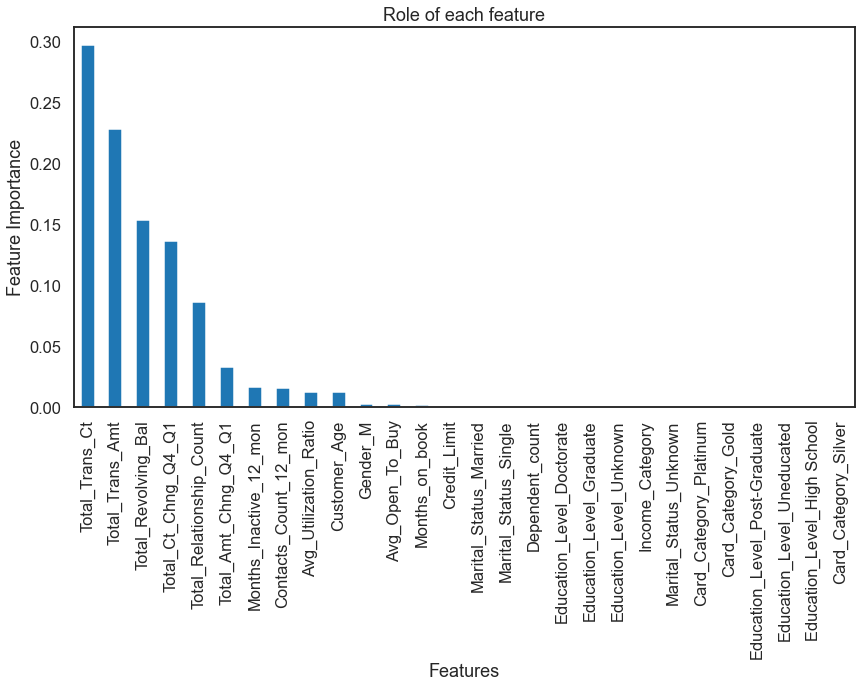

In [49]:
ax= feat_imp_df.plot(kind='bar',figsize=(14,7))
ax.set(xlabel='Features', ylabel= 'Feature Importance',title='Role of each feature')
ax.get_legend().remove();

In [50]:
imp_feats= list(feat_imp_df[feat_imp_df['feat_imp'] >0.07].index)
imp_feats

['Total_Trans_Ct',
 'Total_Trans_Amt',
 'Total_Revolving_Bal',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count']

In [51]:
x2= df_pro[imp_feats]
x2

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count
0,-0.973895,-0.959707,-0.473422,3.834003,0.763943
1,-1.357340,-0.916433,-0.366667,12.608573,1.407306
2,-1.911206,-0.740982,-1.426858,6.807864,0.120579
3,-1.911206,-0.951758,1.661686,6.807864,-0.522785
4,-1.570365,-1.056263,-1.426858,7.509325,0.763943
...,...,...,...,...,...
10122,2.221481,3.259358,0.844455,0.608119,-0.522785
10123,0.176440,1.283475,1.255524,-0.122745,0.120579
10124,-0.207005,1.732994,-1.426858,0.444305,0.763943
10125,-0.121795,1.174848,-1.426858,0.041070,0.120579


## Reducing features on the basis of their Importance

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x2, y, test_size=0.3, random_state=42)

In [53]:
params= {'max_depth':range(1,gb.max_depth+1,2),
         'max_features':range(1,len(gb.feature_importances_+1))
        }
                                                                                             

gs_gb= GridSearchCV(param_grid= params,
                   estimator= gb,
                   cv=6,
                   scoring='accuracy',
                   n_jobs=-1).fit(x_train, y_train)

y_train_pred= gs_gb.predict(x_train)
y_test_pred= gs_gb.predict(x_test)

In [54]:
results= pd.concat([get_evaluation(y_train, y_train_pred,'train'), get_evaluation(y_test, y_test_pred,'test')], axis=1)
print('Train Results', '\n',classification_report(y_train, y_train_pred))
print('Test Results- ','\n',classification_report(y_test, y_test_pred))
print('\n')
results

Train Results 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1131
           1       0.97      0.98      0.98      5957

    accuracy                           0.96      7088
   macro avg       0.94      0.91      0.92      7088
weighted avg       0.96      0.96      0.96      7088

Test Results-  
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039





,train,test
accuracy,0.959791,0.948338
precision,0.968605,0.957439
recall,0.984052,0.981911
f1_score,0.976268,0.969520


##  K-Means Clustering as Feature Engineering

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans= KMeans(n_clusters= 2, max_iter=2000)
x2['clusters']= kmeans.fit_predict(x2)

In [57]:
x_train, x_test, y_train, y_test= train_test_split(x2, y, test_size=0.3, random_state=42)

In [58]:
params= {'max_depth':range(1,gb.max_depth+1,2),
         'max_features':range(1,len(gb.feature_importances_+1))
        }
                                                                                             

gs_gb= GridSearchCV(param_grid= params,
                   estimator= gb,
                   cv=6,
                   scoring='accuracy',
                   n_jobs=-1).fit(x_train, y_train)

y_train_pred= gs_gb.predict(x_train)
y_test_pred= gs_gb.predict(x_test)

In [59]:
results= pd.concat([get_evaluation(y_train, y_train_pred,'train'), get_evaluation(y_test, y_test_pred,'test')], axis=1)
print('Train Results', '\n',classification_report(y_train, y_train_pred))
print('Test Results- ','\n',classification_report(y_test, y_test_pred))
print('\n')
results

Train Results 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1131
           1       0.97      0.99      0.98      5957

    accuracy                           0.96      7088
   macro avg       0.94      0.91      0.93      7088
weighted avg       0.96      0.96      0.96      7088

Test Results-  
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039





,train,test
accuracy,0.961766,0.950313
precision,0.969142,0.958238
recall,0.985899,0.983484
f1_score,0.977449,0.970697


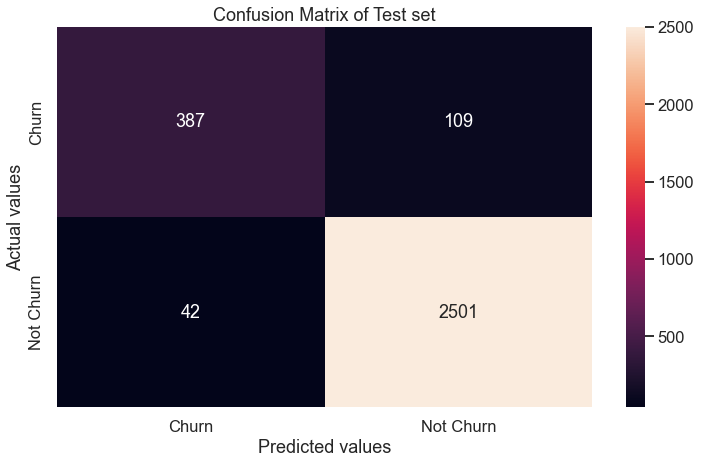

In [60]:
plt.figure(figsize=(12,7))
ax= sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
label= ['Churn', 'Not Churn']
ax.set_xticklabels(label)
ax.set_yticklabels(label)
ax.set(xlabel='Predicted values',ylabel= 'Actual values', title= 'Confusion Matrix of Test set');

After applying Feature Importance and Clustering as feature engineering we see that accuracy went a little low but at the same time overfitting is also reduced specifically in case of recall score. But the numbers did not change drastically, hence we can also continue without removing less important features.